# Figure 1: Behavior and Neural Discrimination plots

## NRK todo:
1) Dump Fig1 and Fig1stats in plotting.FigMirror class and use to make identical subplots for each.

2) Add in another row of subplots and dump in max projections for example session + subplots for calcium activity.

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path
import os

# Import project specific modules and enable automatic reloading
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as erp
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc

In [4]:
# Fix for only certain xticks appearing...
def fix_xticks(ax, days_plot = [-2, -1, 4, 1, 2, 7]):
    days_str = [str(e) for e in days_plot]
    plt.sca(ax)
    plt.xticks(list(range(len(days_plot))), days_str)


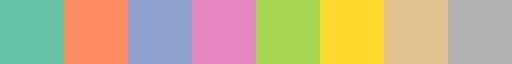

In [5]:
plt.get_cmap('Set2')

In [ ]:
# Set up main figure plotting
%matplotlib ipympl
Fig1 = Fig(num=1, grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(Fig1.fig.get_size_inches())

In [ ]:
# Set up main figure stats companion plot and mirror it into FigMirror class
Fig1stats = Fig(num='Figure 1 stats', grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(Fig1stats.fig.get_size_inches())
Fig1comb = FigMirror(Fig1, Fig1stats)

In [ ]:
# Set up FigS1 and stats fig for it
FigS1 = Fig(num="Figure S1", grid=(3, 4), size=(8.5, 4.75), fontsize=6)
print(FigS1.fig.get_size_inches())
FigS1stats = Fig(num='Figure S1 stats', grid=(3, 4), size=(8.5, 4.75), fontsize=6)
print(FigS1stats.fig.get_size_inches())
FigS1comb = FigMirror(FigS1, FigS1stats)

In [ ]:
# Designate Placeholders
aexp = Fig1.subplot(Fig1.gs[0, 0:2])
aexp.set_title('Exp. Outline Here')
aexp.axis('off')
plt.draw()

## Start with behavioral plots

In [ ]:
# Plot Control mice behavior - dump into supplemental.
axc, astatsc = FigS1comb.subplot(341)
figc, axc, fratio_cont = er.plot_all_freezing(err.control_mice_good, ax=axc, s=9, xoffset=0.1)
axc.set_ylim([-0.025, 0.80])
axc.set_title('Control')
fix_xticks(axc)
axc.set_xlabel('')
axc.set_xticklabels('')

In [ ]:
# Increase in arena-specific freezing from days -2/-1 to days 1/2 is significant for controls
tstatc, ptc = s.ttest_ind((fratio_cont[1, 0:2, :] - fratio_cont[0, 0:2, :]).reshape(-1),
                           (fratio_cont[1, 3:5, :] - fratio_cont[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(ptc/2)
print(tstatc)

# astatsc = Fig1stats.subplot(343)
astatsc.text(0.1, 0.7, 'Control Mice')
astatsc.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsc.text(0.1, 0.5, f'p={ptc/2:0.3g}')
astatsc.text(0.1, 0.4, f'tstat={tstatc:0.3g}')
astatsc.axis('off')

In [ ]:
# Plot ANI mice behavior
axa, astatsa = Fig1comb.subplot(447)
figa, axa, fratio_ani = er.plot_all_freezing(err.ani_mice_good, ax=axa, s=9, xoffset=0.1)
axa.set_ylim([-0.025, 0.80])
fix_xticks(axa)
axa.set_xlabel('')
axa.set_xticklabels('')
axa.set_ylabel('')
axa.set_title('Anisomycin')

In [ ]:
# Non-significant increase in freezing for ANI mice from before to after (days -2/-1 to days 1/2)
tstata, pta = s.ttest_ind((fratio_ani[1, 0:2, :] - fratio_ani[0, 0:2, :]).reshape(-1),
                           (fratio_ani[1, 3:5, :] - fratio_ani[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(pta/2)
print(tstata)

astatsa.text(0.1, 0.7, 'ANI Mice')
astatsa.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsa.text(0.1, 0.5, f'p={pta/2:0.3g}')
astatsa.text(0.1, 0.4, f'tstat={tstata:0.3g}')
astatsa.axis('off')

In [ ]:
# Calculate Discrimination Index (DI) ratios for day 1-2
learning_cutoff = -0.35

# Controls
DI_aft = ((fratio_cont[0, 3:5, :] - fratio_cont[1, 3:5, :]).reshape(-1))/((fratio_cont[0, 3:5, :] + 
                                                                           fratio_cont[1, 3:5, :]).reshape(-1))
# ANI - not used due to this being a poor metric if animals don't freeze a lot, only good for specifying
# how specific a memory is in mice that actually freeze.  See next block.
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

In [ ]:
# Here are all the DIs for controls averaged across days 1 and 2 - note that this metric can distort things as 
# animal 3, for example, freezes very little in either arena and so is a non-learner even though he has a lower DI
# value, while animal 1 and animal 3 freeze in both arenas and are also a non-learner.
DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0)

In [ ]:
from itertools import compress
# Print out learners vs. non-learners
learn_bool = DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0) < learning_cutoff
# learners = err.control_mice_good[learn_bool]
learners = list(compress(err.control_mice_good, learn_bool))
nonlearners = list(compress(err.control_mice_good, ~learn_bool))
print('Learners')
print(learners)
# Check that matches what's in your code
print(err.learners)

# Note that Marble 14 can't really be designated either way since his open field behavioral data was corrupted on
# those days. However, he would likely be a non-learner since he barely freezes in the shock arena after shock.
print('Non-Learners')
print(nonlearners)
# Check that matches what's in your code
print(err.nonlearners)

In [ ]:
# Plot non-learners and learners
axlrn, astatslrn = Fig1comb.subplot(443)
_, axlrn, fratio_lrn = er.plot_all_freezing(err.learners, ax=axlrn, s=9, xoffset=0.1)
axlrn.set_title('Learners')
axlrn.set_ylim([-0.025, 0.80])

axnlrn, astatsnl = Fig1comb.subplot(444)
_, axnlrn, fratio_nl = er.plot_all_freezing(err.nonlearners, ax=axnlrn, s=9, xoffset=0.1)
axnlrn.set_ylim([-0.025, 0.80])
axnlrn.set_ylabel('')
axnlrn.set_title('Non-Learners')

In [ ]:
# Highly sig freezing for Learners
tstatlrn, ptlrn = s.ttest_ind((fratio_lrn[1, 0:2, :] - fratio_lrn[0, 0:2, :]).reshape(-1),
                           (fratio_lrn[1, 3:5, :] - fratio_lrn[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(ptlrn)
print(tstatlrn)

astatslrn.text(0.1, 0.7, 'Learners')
astatslrn.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatslrn.text(0.1, 0.5, f'p={ptlrn/2:0.3g}')
astatslrn.text(0.1, 0.4, f'tstat={tstatlrn:0.3g}')
astatslrn.axis('off')

In [ ]:
# Non-sig freezing for NonLearners
tstatnl, ptnl = s.ttest_ind((fratio_nl[1, 0:2, :] - fratio_nl[0, 0:2, :]).reshape(-1),
                           (fratio_nl[1, 3:5, :] - fratio_nl[0, 3:5, :]).reshape(-1), nan_policy='omit')

print(ptnl)
print(tstatnl)

astatsnl.text(0.1, 0.7, 'Non-Learners')
astatsnl.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsnl.text(0.1, 0.5, f'p={ptnl/2:0.3g}')
astatsnl.text(0.1, 0.4, f'tstat={tstatnl:0.3g}')
astatsnl.axis('off')

In [ ]:
## Run stats - group of interests are Learners vs. ANI, other comparisons included for completeness.
pval_bwgroup_1sidedt_specific = np.ones(6)*np.nan
pval_ani_nl_1sidedt_specific = np.ones(6)*np.nan
pval_lrn_nl_1sidedt_specific = np.ones(6)*np.nan
pval_bwgroup_1sidedt_shockonly = np.ones(6)*np.nan # bw lrn and ani directly, no accounting for specificity
for id in range(0, 6):
    
    # ANI vs Learners
    stats, pval = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # ANI vs Non-Learners
    stats_nla, pval_nla = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # Learners vs Non-Learners
    stats_lrnnl, pval_lrnnl = s.ttest_ind(fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    

    statss, pvals = s.ttest_ind(fratio_ani[1, id, :], fratio_lrn[1, id, :], nan_policy='omit')
    pval_bwgroup_1sidedt_shockonly[id] = pvals/2

    # Hypothesis is that ani freezing is less than control guys relative to neutral arena
    # So if ani guys mean freezing relative to shock is < 0 (i.e. if stats < 0), divide the pvalue by 2
    # If it's actually larger, then test fails and p = 1-pval/2
    if stats < 0:
        pval_bwgroup_1sidedt_specific[id] = pval/2
    elif stats > 0:
        pval_bwgroup_1sidedt_specific[id] = 1 - pval/2
        
    if stats_nla < 0:
        pval_ani_nl_1sidedt_specific[id] = pval_nla/2
    elif stats_nla > 0:
        pval_ani_nl_1sidedt_specific[id] = 1 - pval_nla/2
       
    if stats_lrnnl < 0:
        pval_lrn_nl_1sidedt_specific [id] = pval_lrnnl/2
    elif stats_lrnnl > 0:
        pval_lrn_nl_1sidedt_specific [id] = 1 - pval_lrnnl/2


In [ ]:
# Add between group stats to stats figure
abw_grp_stats = Fig1stats.subplot(Fig1stats.gs[0, 0:2])
days = [-2, -1, 4, 1, 2, 7]
abw_grp_stats.text(0.1, 0.8, '1-sided t-test bw groups')
abw_grp_stats.text(0.1, 0.7, 'Learners v ANI shock arena only')
abw_grp_stats.text(0.1, 0.6, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_bwgroup_1sidedt_shockonly)])

abw_grp_stats.text(0.1, 0.5, 'ANI vs Non-learners shock-open freezing')
abw_grp_stats.text(0.1, 0.4, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_ani_nl_1sidedt_specific)])

abw_grp_stats.text(0.1, 0.3, 'Non-Learners vs. Learners')
abw_grp_stats.text(0.1, 0.2, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_lrn_nl_1sidedt_specific)])

## DI between arena same day vs. within arena across days relationship

In [ ]:
# Get overlap ratios and DIs for all sessions days -2/-1 and days 1/2
overlap_win_all, overlap_bw_all = [], []
DI_win_all, DI_bw_all = [], []
day_pairs = [[-2, -1], [1, 2]]
for mouse in err.all_mice_good:
    # Get turnover between arenas on days -2 and -1 and average them
    o_bw_temp = []
    o_win_temp = []
    DI_bw_temp, DI_win_temp = [], []
    for day_pair in day_pairs:
        for day in day_pair:
            _, _, oboth, _, _ = pfs.get_overlap(mouse, 'Open', day, 'Shock', day, batch_map=True)
            o_bw_temp.append(oboth)
            DIneurons = discr.get_DI_scores(mouse, 'Open', day, 'Shock', day, batch_map_use=True)
            DI_bw_temp.append(np.mean(np.abs(DIneurons)))
        overlap_bw_all.append(np.nanmean(o_bw_temp))
        DI_bw_all.append(np.nanmean(DI_bw_temp))

        # Get turnover within each arena from days -2 to -1 and average them

        for arena in ['Shock', 'Open']:
            _, _, oboth, _, _ = pfs.get_overlap(mouse, arena, day_pair[0], arena, day_pair[1], 
                                                                 batch_map=True)
            o_win_temp.append(oboth)
            DIneurons = discr.get_DI_scores(mouse, 'Open', day_pair[0], 'Shock', day_pair[1], batch_map_use=True)
            DI_win_temp.append(np.mean(np.abs(DIneurons)))
        overlap_win_all.append(np.nanmean(o_win_temp))
        DI_win_all.append(np.nanmean(DI_win_temp))
        
ax_olap_t_v_arena, ax_olap_t_v_arena_stats = FigS1comb.subplot(345)
ax_olap_t_v_arena.plot(overlap_win_all, overlap_bw_all, '.')
ax_olap_t_v_arena.set_ylabel('Cell Overlap w/in arenas (1 day lag)')
ax_olap_t_v_arena.set_xlabel('Cell Overlap b/w arenas (same day)')
sns.despine(ax=ax_olap_t_v_arena)

ax_DI_t_v_arena, ax_DI_t_v_arena_stats = Fig1comb.subplot(448)
ax_DI_t_v_arena.plot(DI_win_all, DI_bw_all, '.')
ax_DI_t_v_arena.set_ylabel(r"$\overline{|DI_{neural}|}$ Arena")
ax_DI_t_v_arena.set_xlabel(r"$\overline{|DI_{neural}|}$ Time")
sns.despine(ax=ax_DI_t_v_arena)

# Super significant correlation with all the points
r, p = s.stats.spearmanr(overlap_win_all, overlap_bw_all)
print('\033[4mSpearman Correlation (overlap ratio) \033[0m')
print('r = ' + str(r))
print('p = ' + str(p))
ax_olap_t_v_arena_stats.text(0.1, 0.9, '\033[4mSpearman Correlation (overlap ratio) \033[0m')
ax_olap_t_v_arena_stats.text(0.1, 0.8, 'r = ' + str(r))
ax_olap_t_v_arena_stats.text(0.1, 0.7, 'p = ' + str(p))
sns.despine(ax=ax_olap_t_v_arena_stats)

rdi, pdi = s.stats.spearmanr(DI_win_all, DI_bw_all)
print('\033[4mSpearman Correlation (DI ratio) \033[0m')
print('r = ' + str(rdi))
print('p = ' + str(pdi))
ax_DI_t_v_arena_stats.text(0.1, 0.9, '\033[4mSpearman Correlation (DI ratio) \033[0m')
ax_DI_t_v_arena_stats.text(0.1, 0.8, 'r = ' + str(rdi))
ax_DI_t_v_arena_stats.text(0.1, 0.7, 'p = ' + str(pdi))

## DI ratio plots by group

In [ ]:
# Calculate DI ratio for all groups
DI_lrn = (fratio_lrn[0] - fratio_lrn[1])/(fratio_lrn[0] + fratio_lrn[1])
DI_nl = (fratio_nl[0] - fratio_nl[1])/(fratio_nl[0] + fratio_nl[1])
DI_a = (fratio_ani[0] - fratio_ani[1])/(fratio_ani[0] + fratio_ani[1])

# Dump into nice dataframe
DI_all = []
days_all = []
grp_all = []
for DI, grp in zip([DI_lrn, DI_nl, DI_a], ['Learners', 'Non-Learners', 'ANI']):
    DI_all.extend(DI.reshape(-1))
    grp_all.extend([grp for _ in DI.reshape(-1)])
    days_all.extend(np.matlib.repmat(days, DI.shape[1], 1).T.reshape(-1))

DIdf = pd.DataFrame({'DI': DI_all, 'Day': days_all, 'Group': grp_all})

Make behavioral breakdown plots showing DI is different between Learners and Non-Learners/ANI

In [ ]:
axDIaft, axDIaft_stats = Fig1comb.subplot([Fig1.gs[2, 2], Fig1stats.gs[2, 2]])
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2))]
sns.stripplot(x='Group', y='DI', data=DIaft, ax=axDIaft, palette='Set2', size=3)
axDIaft.set_title('After: Days 1 and 2')
axDIaft.set_ylabel('$DI_{beh}$')

Run stats on this plot

In [ ]:
tstat_aft_ln, p_aft_ln = s.ttest_ind(DIaft[DIaft.Group == 'Learners'].DI, DIaft[DIaft.Group == 'Non-Learners'].DI)
tstat_aft_la, p_aft_la = s.ttest_ind(DIaft[DIaft.Group == 'Learners'].DI, DIaft[DIaft.Group == 'ANI'].DI)
tstat_aft_na, p_aft_na = s.ttest_ind(DIaft[DIaft.Group == 'Non-Learners'].DI, DIaft[DIaft.Group == 'ANI'].DI)

# axDIaft_stats = Fig1stats.subplot(346)
groups = ['L v NL', 'L v ANI', 'NL v ANI']
axDIaft_stats.text(0.1, 0.7, '1-sided t-test DIbehavior bw groups days 1 and 2')
ytext = 0.6
for grp, tstat, p in zip(groups, [tstat_aft_ln, tstat_aft_la, tstat_aft_na], [p_aft_ln, p_aft_la, p_aft_na]):
    puse = p/2 if tstat < 0 else 1 - p/2
    axDIaft_stats.text(0.1, ytext, f'{grp}: p={puse:0.3g} w/tstat={tstat:0.3g}')
    ytext -= 0.1

Get cell overlap between arenas for each day and dump into DI dataframe.

In [ ]:
days = [-2, -1, 4, 1, 2, 7]
mice_grp = [err.learners, err.nonlearners, err.ani_mice_good]
overlaps_all = []
for mice in mice_grp:
    grp_overlaps = []
    for mouse in mice:
        mouse_overlaps = []
        for day in days:
            _, _, overlap, _, _ = pfs.get_overlap(mouse, 'Shock', day, 'Open', day)
            mouse_overlaps.append(overlap)
        grp_overlaps.append(mouse_overlaps)
    overlaps_all.append(np.asarray(grp_overlaps).T)

# Now build up in same way as above for consistency
olap_list = []
for olap, grp in zip(overlaps_all, ['Learners', 'Non-Learners', 'ANI']):
    olap_list.extend(olap.reshape(-1))
DIdf.insert(2, 'Cell Overlap', olap_list)

In [ ]:
# Calculate neural discrimination index

days = [-2, -1, 4, 1, 2, 7]
mice_grp = [err.learners, err.nonlearners, err.ani_mice_good]
discr_all = []
for mice in mice_grp:
    grp_discr = []
    for mouse in mice:
        mouse_discr = []
        for day in days:
            DIneurons = discr.get_DI_scores(mouse, 'Open', day, 'Shock', day)
            mouse_discr.append(np.mean(np.abs(DIneurons)))
        grp_discr.append(mouse_discr)
    discr_all.append(np.asarray(grp_discr).T)

# Now build up in same way as above for consistency
DImean_list = []
for DImean, grp in zip(discr_all, ['Learners', 'Non-Learners', 'ANI']):
    DImean_list.extend(DImean.reshape(-1))
DIdf.insert(3, '|DI|mean', DImean_list)

In [ ]:
DIdf

Plot DIneuron by group BEFORE shock

In [ ]:
axDIbef, axDIbef_stats = Fig1comb.subplot([Fig1.gs[2, 3], Fig1stats.gs[2, 3]])
DIbef = DIdf[((DIdf['Day'] == -2) | (DIdf['Day'] == -1))]
sns.stripplot(x='Group', y='|DI|mean', data=DIbef, ax=axDIbef, palette='Set2', size=3)
fix_xticks(axDIbef,['Learners', 'Non-Learners', 'ANI'])
axDIbef.set_title('Before: Days -2 and -1')
axDIbef.set_ylabel(r"$\overline{|DI_{neural}|}$")

In [ ]:
# axDIbef_stats = Fig1stats.subplot(Fig1stats.gs[2, 1])
statb_ln, pb_ln = s.ttest_ind(DIbef[DIbef.Group == 'Non-Learners']['|DI|mean'], 
                              DIbef[DIbef.Group == 'Learners']['|DI|mean'])
statb_an, pb_an = s.ttest_ind(DIbef[DIbef.Group == 'ANI']['|DI|mean'], 
                              DIbef[DIbef.Group == 'Non-Learners']['|DI|mean'])
statb_la, pb_la = s.ttest_ind(DIbef[DIbef.Group == 'ANI']['|DI|mean'],
                              DIbef[DIbef.Group == 'Learners']['|DI|mean'])

axDIbef_stats.text(0.1, 0.8, 'two-sided t-test abs(DIneural)_mean BEFORE shock days')
axDIbef_stats.text(0.1, 0.7, f'NL vs. L p={pb_ln:0.3g} w/tstat={statb_ln:0.3g}')
axDIbef_stats.text(0.1, 0.6, f'NL vs. ANI p={pb_an:0.3g} w/tstat={statb_an:0.3g}')
axDIbef_stats.text(0.1, 0.5, f'ANI vs. L p={pb_la:0.3g} w/tstat={statb_la:0.3g}')
print(pb_ln)
print(pb_an)
print(pb_la)

Plot DIneural v DIbehavior for AFTER sessions.

In [ ]:
axDIvDI, axDIvDIstats = Fig1comb.subplot([Fig1.gs[3, 2], Fig1stats.gs[3, 2]])
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2) | (DIdf['Day'] == 7))]
sns.scatterplot(x='DI', y='|DI|mean', data=DIaft[DIaft.Group != 'ANI'], hue='Group', ax=axDIvDI,
                size=2, palette='Set2', legend=False)
axDIvDI.set_xlabel(r"$DI_{beh}$")
axDIvDI.set_ylabel(r"$\overline{|DI_{neural}|}$")

Get Stats and plot regression lines over actual plot

In [ ]:
# axDIvDIstats = Fig1stats.subplot(Fig1stats.gs[2, 2])
cmap_use = plt.get_cmap('Set2')

# Learners
corr_lrn, p_corr_lrn = s.spearmanr(DIaft[DIaft.Group == 'Learners']['DI'], 
                                   DIaft[DIaft.Group == 'Learners']['|DI|mean'])
lrn_lreg = s.linregress(DIaft[DIaft.Group == 'Learners']['DI'], DIaft[DIaft.Group == 'Learners']['|DI|mean'])
lrn_range = np.array([np.min(DIaft[DIaft.Group == 'Learners']['DI']), 
                      np.max(DIaft[DIaft.Group == 'Learners']['DI'])])
axDIvDI.plot(lrn_range, lrn_range*lrn_lreg.slope + lrn_lreg.intercept, linestyle='-', color=cmap_use.colors[0])
axDIvDIstats.text(0.1, 0.7, 'Spearman rho for DIneural vs DIbeh')
axDIvDIstats.text(0.1, 0.6, f'Learners rho={corr_lrn:0.3g}, pval={p_corr_lrn:0.3g}')

# Non-Learners             
corr_nl, p_corr_nl = s.spearmanr(DIaft[DIaft.Group == 'Non-Learners']['DI'], 
                                   DIaft[DIaft.Group == 'Non-Learners']['|DI|mean'], nan_policy='omit')
df_aftnl = DIaft[DIaft.Group == 'Non-Learners'][~DIaft[DIaft.Group == 'Non-Learners']['DI'].isna()]  # Remove nan
nl_lreg = s.linregress(df_aftnl['DI'], df_aftnl['|DI|mean'])
nl_range = np.array([np.min(df_aftnl['DI']), np.max(df_aftnl['DI'])])
axDIvDI.plot(nl_range, nl_range*nl_lreg.slope + nl_lreg.intercept, linestyle='-', color=cmap_use.colors[1])
axDIvDIstats.text(0.1, 0.5, f'Non-Learners rho={corr_nl:0.3g}, pval={p_corr_nl:0.3g}')

print(p_corr_lrn)
print(p_corr_nl)

In [ ]:
axolapvDI, axolapvDIstats = Fig1comb.subplot([Fig1.gs[3, 3], Fig1stats.gs[3, 3]])
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2) | (DIdf['Day'] == 7))]
sns.scatterplot(x='DI', y='Cell Overlap', data=DIaft[DIaft.Group != 'ANI'], hue='Group', ax=axolapvDI, 
                palette='Set2', size=1, legend=False)
axolapvDI.set_xlabel(r"$DI_{beh}$")
axolapvDI.set_ylabel("Overlap Ratio b/w arenas")

In [ ]:
# Stats for overlap v DI
# axolapvDIstats = Fig1stats.subplot(Fig1stats.gs[2, 3])

# Learners
olap_corr_lrn, p_olap_corr_lrn = s.spearmanr(DIaft[DIaft.Group == 'Learners']['DI'], 
                                   DIaft[DIaft.Group == 'Learners']['Cell Overlap'])
lrn_olap_lreg = s.linregress(DIaft[DIaft.Group == 'Learners']['DI'], DIaft[DIaft.Group == 'Learners']['Cell Overlap'])
lrn_olap_range = np.array([np.min(DIaft[DIaft.Group == 'Learners']['DI']), 
                      np.max(DIaft[DIaft.Group == 'Learners']['DI'])])
axolapvDI.plot(lrn_olap_range, lrn_olap_range*lrn_olap_lreg.slope + lrn_olap_lreg.intercept, 
               linestyle='-', color=cmap_use.colors[0])
axolapvDIstats.text(0.1, 0.7, 'Spearman rho for olap vs DIbeh')
axolapvDIstats.text(0.1, 0.6, f'Learners rho={olap_corr_lrn:0.3g}, pval={p_olap_corr_lrn:0.3g}')

# Non-Learners
df_aftnl = DIaft[DIaft.Group == 'Non-Learners'][~DIaft[DIaft.Group == 'Non-Learners']['DI'].isna()]  # Remove nan
olap_corr_nl, p_olap_corr_nl = s.spearmanr(df_aftnl['DI'], df_aftnl['Cell Overlap'], nan_policy='omit')
nl_olap_lreg = s.linregress(df_aftnl['DI'], df_aftnl['Cell Overlap'])
nl_olap_range = np.array([np.min(df_aftnl['DI']), np.max(df_aftnl['DI'])])
axolapvDI.plot(nl_olap_range, nl_olap_range*nl_olap_lreg.slope + nl_olap_lreg.intercept, 
               linestyle='-', color=cmap_use.colors[1])
axolapvDIstats.text(0.1, 0.5, f'Non-Learners rho={olap_corr_nl:0.3g}, pval={p_olap_corr_nl:0.3g}')

print(olap_corr_lrn)
print(p_olap_corr_lrn)
print(olap_corr_nl)
print(p_olap_corr_nl)

### Finally generate some example traces of on/off neurons and highly discriminative neurons

In [ ]:
import scipy.io as sio
traces = []
for arena in ['Open', 'Shock']:
    dir_use = pf.get_dir('Marble11', arena, -1)
    im_data_file = path.join(dir_use, 'FinalOutput.mat')
    im_data = sio.loadmat(im_data_file)
    traces.append(im_data['NeuronTraces'])

traces_o = traces[0][0,0].squeeze()[0]
traces_s = traces[1][0,0].squeeze()[0]

For notebook only - as a reference to make sure sorting is working properly (it is!)

In [ ]:
_, axtest = plt.subplots(1, 2)
day = -1

# Import calcium activity
traces_o, psa_o = trc.load_traces('Marble11', 'Open', day, psa=True)
traces_s, psa_s = trc.load_traces('Marble11', 'Shock', day, psa=True)
neuron_map = pfs.get_neuronmap('Marble11', 'Open', day, 'Shock', day)

# Keep only neurons active in both sessions
neuron_map_base = np.where(neuron_map >= 0)
neuron_map_reg = neuron_map[neuron_map >= 0]
psa_o2 = psa_o[neuron_map_base]
psa_s2 = psa_s[neuron_map_reg]
traces_o2 = traces_o[neuron_map_base]
traces_s2 = traces_s[neuron_map_reg]

# Calculate and sort by DI
DIneuron = discr.get_DI_scores('Marble11', 'Open', day, 'Shock', day)
iDI = np.argsort(DIneuron)

# Plot each
sns.heatmap(psa_o2[iDI], ax=axtest[0])
sns.heatmap(psa_s2[iDI], ax=axtest[1])

Plot traces of neurons highly active in one arena vs the other.

In [ ]:
ax00 = Fig1.subplot(Fig1.gs[2, 0])
ax01 = Fig1.subplot(Fig1.gs[2, 1])
ax10 = Fig1.subplot(Fig1.gs[3, 0])
ax11 = Fig1.subplot(Fig1.gs[3, 1])

# This will need to go into 4 separate sub-plots. Trying to cram this into one subplot looks terrible.
# subfig = Fig1.add_subfigure(Fig1.gs[1:, 0])
# axtest = subfig.subplots(2, 2)

plt.rcParams['lines.linewidth'] = 0.5
trc.plot_traces(traces_o2[iDI][0:6], psabool=psa_o2[iDI][0:6], normalize_traces=True, SR=20, ax=ax00)
ax00.set_title('Neutral Arena')
for a in [ax00, ax01]:
    sns.despine(ax=a, bottom=True)
    a.axes.xaxis.set_visible(False)
trc.plot_traces(traces_s2[iDI][0:6], psabool=psa_s2[iDI][0:6], normalize_traces=True, SR=20, ax=ax01)
ax01.set_title('Shock Arena')
trc.plot_traces(traces_o2[iDI][-6:], psabool=psa_o2[iDI][-6:], normalize_traces=True, SR=20, ax=ax10)
trc.plot_traces(traces_s2[iDI][-6:], psabool=psa_s2[iDI][-6:], normalize_traces=True, SR=20, ax=ax11)
for a in [ax01, ax11]:
    sns.despine(ax=a, left=True)
    a.axes.yaxis.set_visible(False)
sns.despine(ax=ax01, bottom=True, left=True)

ax00.set_ylabel('Shock preferring \n dF/F (au)')
ax10.set_ylabel('Neutral preferring \n dF/F (au)')

Last, plot neuron outlines active in one arena versus the other.

In [ ]:
# Learner example - Marble24
axroi_lrn = Fig1.subplot(445)
trc.plot_ROIs_bw_sessions('Marble24', 'Open', -1, 'Shock', -1, ax=axroi_lrn)
axroi_lrn.set_title('Learner')

# Non-Learner example - Marble29
axroi_nl = Fig1.subplot(446)
trc.plot_ROIs_bw_sessions('Marble29', 'Open', -2, 'Shock', -2, ax=axroi_nl)
axroi_nl.set_title('Non-Learner')

## Misc supplemental plots here

In [ ]:
# ANI DI ratios - Plot into supplemental
ahista = FigS1.subplot(344)
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

ahista.hist(DI_aft_ani, histtype='step')
ahista.set_title('ANI: After')
ahista.set_xlabel('$DI_{beh}$')

In [ ]:
# Supplemental to anticipate reviewer question: 
# Exclude Marble29 who is freezing a bunch before even being shocked in shock arena
ax29, ax29stats = FigS1comb.subplot(342)
figcn29, axcn29, fratio_contn29 = er.plot_all_freezing(err.control_mice_good[0:-1], ax=ax29, s=9, xoffset=0.1)
axcn29.set_ylim([-0.025, 0.80])
axcn29.set_title('Control - No Marble29')
fix_xticks(axcn29)

In [ ]:
# Increase in arena-specific freezing from days -2/-1 to days 1/2 is significant for controls
tstat_no29, pt_no29 = s.ttest_ind((fratio_contn29[1, 0:2, :] - fratio_contn29[0, 0:2, :]).reshape(-1),
                           (fratio_contn29[1, 3:5, :] - fratio_contn29[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(pt_no29/2)
print(tstat_no29)

ax29stats = FigS1stats.subplot(342)
ax29stats.text(0.1, 0.7, 'Control Mice - No Marble 29')
ax29stats.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
ax29stats.text(0.1, 0.5, f'p={pt_no29/2:0.3g}')
ax29stats.text(0.1, 0.4, f'tstat={tstat_no29:0.3g}')
ax29stats.axis('off')

In [ ]:
# Plot Discrimination Index (DI) ratios for day 1-2 for control mice
learning_cutoff = -0.35

# Controls
DI_aft = ((fratio_cont[0, 3:5, :] - fratio_cont[1, 3:5, :]).reshape(-1))/((fratio_cont[0, 3:5, :] + 
                                                                           fratio_cont[1, 3:5, :]).reshape(-1))
# subfighist = Fig1.fig.add_subfigure(Fig1.gs[1, 0])
# ahist = subfighist.subplots(1, 2, sharey=True)
ahist = FigS1.subplot(343)
_, bins, cbar = ahist.hist(DI_aft, 6)
ahist.set_ylabel('Count')
ahist.set_xlabel('$DI_{beh}$')
ahist.axvline(learning_cutoff, linestyle='--', color='k')

# ANI - not used due to this being a poor metric if animals don't freeze a lot, only good for specifying
# how specific a memory is in mice that actually freeze.  See next block.
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

## Is freezing in shock box correlated with freezing in the control box?

In [6]:
err.control_mice_good
days = [-2, -1, 4, 1, 2, 7]
df_list = []
for mouse in err.control_mice_good:
    fratios = erp.get_all_freezing(mouse, day_des=days, arenas=["Open", "Shock"])
    df = pd.DataFrame({"Mouse": mouse, "Day": days, "Open": fratios[0, :], "Shock": fratios[1, :]})
    # df_list.append(df.melt(id_vars=["Mouse", "Day"], value_vars=["Open", "Shock"], var_name="Arena", value_name="Frz Ratio"))
    df_list.append(df)
df_frz = pd.concat(df_list).reset_index().drop(columns="index")
df_frz = df_frz[~np.isnan(df_frz.Open)]  # Exclude animals with missing data from EITHER arena
df_frz.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


,Mouse,Day,Open,Shock
30,Marble24,-2,0.050728,0.075690
6,Marble07,-2,0.088444,0.067231
47,Marble29,7,0.431760,0.793856
10,Marble07,2,0.282493,0.501336
25,Marble14,-1,0.006623,0.067231


In [8]:
# Make animal markert plot consistently
df_frz["Mouse"] = pd.Categorical(df_frz["Mouse"], df_frz["Mouse"].unique())

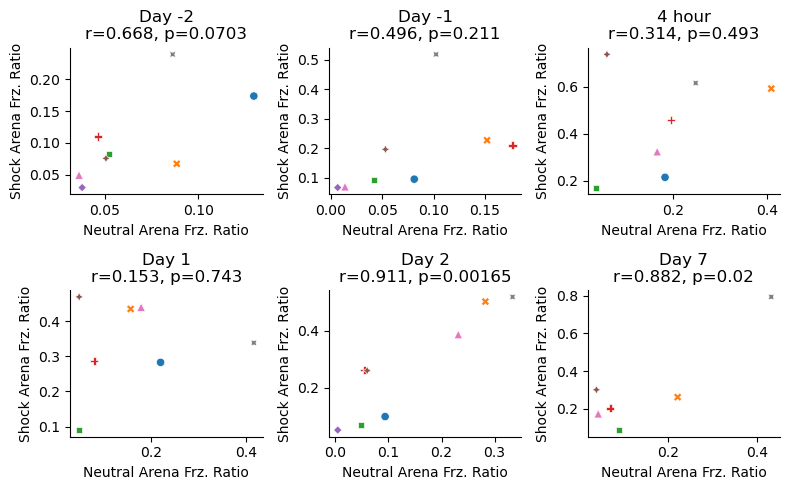

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(8,5), tight_layout=True)
# sns.set(font_scale=1)
for day, a in zip(days, ax.reshape(-1)):
    df_day = df_frz[df_frz.Day == day]
    sns.scatterplot(data=df_day, x="Open", y="Shock", style="Mouse", hue="Mouse", ax=a, legend=False)
    a.set_xlabel("Neutral Arena Frz. Ratio")
    a.set_ylabel("Shock Arena Frz. Ratio")
    # a.set_xticklabels(a.get_xticklabels(), fontsize=10)

    # Run stats
    df_good = df_day[~np.isnan(df_day.Open)]
    res = s.linregress(df_good.Open, df_good.Shock)
    day_str = " ".join(["Day", str(day)]) if day != 4 else "4 hour"
    a.set_title(f"{day_str}\nr={res.rvalue:.3g}, p={res.pvalue:.3g}")
    
sns.despine(fig=fig)

In [ ]:
# NRK try the below but with some other stuff
# figx, axc = plt.subplots(2, 2, figsize=(8, 6))
# for a, a2, arena in zip(axc[0], axc[1], ["Open", "Shock"]):
#     sns.scatterplot(data=df_frz2[df_frz2.Arena == arena], x="Day", y="Frz Ratio", hue="Mouse", style="Mouse", legend=False, ax=a)
#     sns.stripplot(data=df_frz2[df_frz2.Arena == arena], x="Day", y="Frz Ratio", hue="Mouse", legend=False, ax=a2)

In [ ]:
def fix_xlabels(axbad, session_names=True, rotate=False):
    if session_names:
        axbad.set_xticks(axbad.get_xticks())
        axbad.set_xticklabels([f"Day {_.get_text()}" if _.get_text() != '4' else "4 Hour" for _ in axc.get_xticklabels()], ha="right")
    if rotate:
        axbad.tick_params(axis="x", labelrotation=30)
    axbad.set_xlabel('Session')

In [ ]:
%matplotlib ipympl
FigR1 = Fig(num="Reviewer1", grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(FigR1.fig.get_size_inches())

In [ ]:
# figcc, axcc = plt.subplots(1, 3, figsize=(12, 3.5), tight_layout=True)
from plotting import fix_open_legend
aall = FigR1.subplot(441)
alrn = FigR1.subplot(442)
anl = FigR1.subplot(443)
figxx, axcc = FigR1.fig, [aall, alrn, anl]

axc = axcc[0]
sns.stripplot(data=df_frz2, x='Day', y ='Frz Ratio', hue="Arena", dodge=True, size=4, linewidth=0.4, edgecolor='w', ax=axc)

for idd, day in enumerate(days):
    for (x0, y0), (x1, y1) in zip(axc.collections[idd*2].get_offsets(), axc.collections[idd*2+1].get_offsets()):
        axc.plot([x0, x1], [y0, y1], ls='--', color='black')
axc.set_title("All Control Mice")

for axc, grp in zip(axcc[1:], ["Learner", "Non-Learner"]):
    df_use = df_frz2[df_frz2.Group == grp]
    sns.stripplot(data=df_use, x='Day', y ='Frz Ratio', hue="Arena", dodge=True, size=4, linewidth=0.4, edgecolor='w', ax=axc)

    for idd, day in enumerate(days):
        for (x0, y0), (x1, y1) in zip(axc.collections[idd*2].get_offsets(), axc.collections[idd*2+1].get_offsets()):
            axc.plot([x0, x1], [y0, y1], ls='--', color='black')
    axc.set_title(f"{grp}s")

[fix_xlabels(axc, rotate=30) for axc in axcc];

sns.despine(fig=figcc)
fix_open_legend(axcc)
FigR1.fig

## Save Figures

In [ ]:
Fig1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1'), scriptname='Figure1Notebook')

In [ ]:
Fig1stats.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1stats'), scriptname='Figure1Notebook')

In [ ]:
FigS1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigS1'), scriptname='Figure1Notebook')

In [ ]:
FigS1stats.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigS1stats'), scriptname='Figure1Notebook')


In [ ]:
FigR1.savefig('FigR1_generalized_freezing', scriptname='Figure1Notebook')